In [4]:
import sys
import datetime
import matplotlib.pyplot as plt
sys.path.insert(0, r"/mnt/c/Users/Trez/Desktop/tudat-bundle/tudatpy/")
from tudatpy.data.horizons import HorizonsQuery

In [5]:
# b = HorizonsQuery(
#     query_id="-28",
#     location="@SSB",
#     epoch_start=datetime.datetime(2023, 6, 1),
#     epoch_end=datetime.datetime(2023, 6, 30),
#     epoch_step="1d",
# )
# query = HorizonsQuery(
#     query_id="-61",
#     location="@SSB",
#     epoch_start=datetime.datetime(2011, 9, 1),
#     epoch_end=datetime.datetime(2023, 9, 1),
#     epoch_step="1d",
# )
query = HorizonsQuery(
    query_id="-121",
    location="@SSB",
    epoch_start=datetime.datetime(2018, 10, 21),
    epoch_end=datetime.datetime(2023, 9, 1),
    epoch_step="1d",
)
mercury = HorizonsQuery(
    query_id="199",
    location="@SSB",
    epoch_start=datetime.datetime(2018, 10, 21),
    epoch_end=datetime.datetime(2023, 9, 1),
    epoch_step="1d",
).carthesian()
venus = HorizonsQuery(
    query_id="299",
    location="@SSB",
    epoch_start=datetime.datetime(2018, 10, 21),
    epoch_end=datetime.datetime(2023, 9, 1),
    epoch_step="1d",
).carthesian()
earth = HorizonsQuery(
    query_id="399",
    location="@SSB",
    epoch_start=datetime.datetime(2018, 10, 21),
    epoch_end=datetime.datetime(2023, 9, 1),
    epoch_step="1d",
).carthesian()

vec = (query.carthesian(refplane="ecliptic",))

print(vec.shape)
print(query.create_ephemeris_tabulated(frame_origin="SSB", frame_orientation="ECLIPJ2000", refplane="ecliptic"))

(1777, 7)


(1777, 7)
[[5.93352000e+08 1.32018751e+11 6.92443738e+10 1.31700979e+07]
 [5.93438400e+08 1.30485485e+11 7.13809574e+10 4.70739263e+07]
 [5.93524800e+08 1.28919764e+11 7.34991082e+10 8.02419753e+07]
 [5.93611200e+08 1.27317613e+11 7.55963747e+10 1.13059215e+08]
 [5.93697600e+08 1.25677906e+11 7.76714004e+10 1.45653215e+08]]


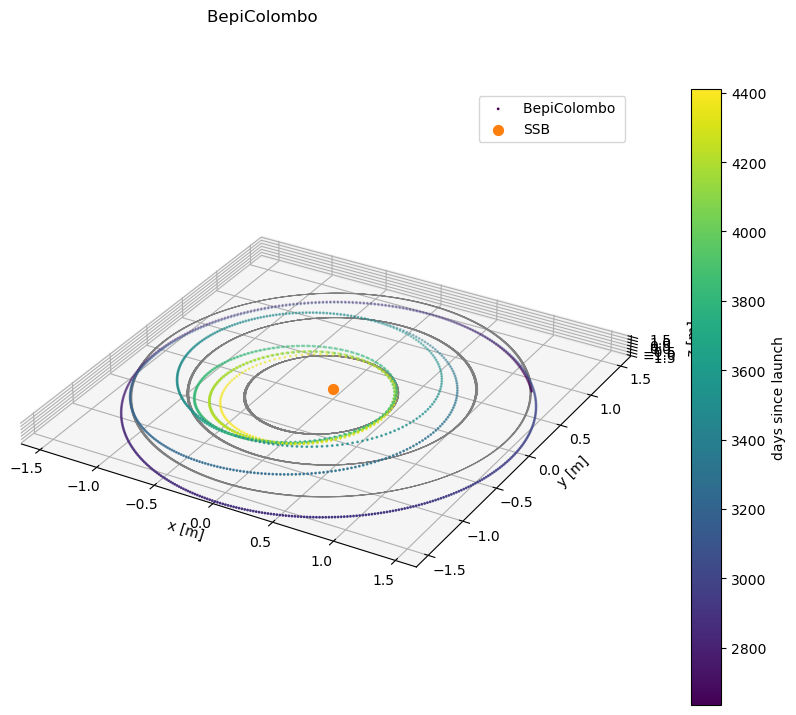

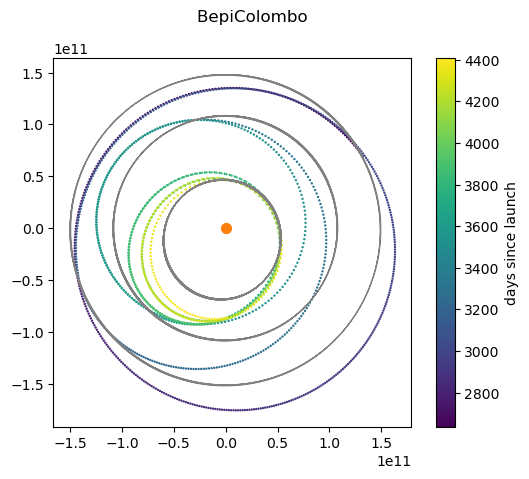

In [6]:
fig, ax = plt.subplots(1, 1, subplot_kw=dict(projection="3d"), figsize=(15,8))
print(vec.shape)
print(vec[:5, 0:4])
a = ax.scatter(vec[:,1], vec[:,2], vec[:,3], c=(vec[:, 0]/86400)-(365.25*11) - (215), s=1, label=query.name,)

ax.plot(mercury[:, 1], mercury[:, 2], mercury[:, 3], color="grey", linewidth=0.5)
ax.plot(venus[:, 1], venus[:, 2], venus[:, 3], color="grey", linewidth=0.5)
ax.plot(earth[:, 1], earth[:, 2], earth[:, 3], color="grey", linewidth=0.5)

ax.scatter(0, 0, 0, color="tab:orange", s=50, label="SSB")
fig.suptitle(query.name)

ax.set_xlabel("x [m]")
ax.set_ylabel("y [m]")
ax.set_zlabel("z [m]")
ax.set_aspect("equal")
ax.legend()

ax.set_xlim(-1.6e11, 1.6e11)
ax.set_ylim(-1.6e11, 1.6e11)
ax.set_zlim(-1.6e11, 1.6e11)

plt.colorbar(a, label="days since launch")

fig, ax = plt.subplots(1, 1)

aa=ax.scatter(vec[:, 1], vec[:, 2], c=(vec[:, 0]/86400)-(365.25*11) - (215), s=0.5)
ax.scatter(0, 0, color="tab:orange", s=50, label="SSB")
ax.plot(mercury[:, 1], mercury[:, 2], color="grey", linewidth=0.5)
ax.plot(venus[:, 1], venus[:, 2], color="grey", linewidth=0.5)
ax.plot(earth[:, 1], earth[:, 2], color="grey", linewidth=0.5)
ax.set_aspect("equal")
fig.suptitle(query.name)
plt.colorbar(aa, label="days since launch")